In [33]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.utils.data as data
from CHR.models import resnet101_CHR
from CHR.util import Warp
from PIL import Image
import os
import matplotlib.pyplot as plt

In [34]:
num_classes = 5

# load model
model = resnet101_CHR(num_classes, pretrained=True)
object_categories =['Gun','Knife','Wrench','Pliers','Scissors']
filename = os.path.join('./CHR/models-10/model_best.pth.tar')
checkpoint = torch.load(filename, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])
model.eval()

/home/eli/dev/school/data-science/did/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/eli/dev/school/data-science/did/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNetCHR(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kern

In [35]:
def load_image(path):
    img = Image.open(path).convert('RGB')
    return img

In [36]:
# image_id = 'P07122' # Wrench
# image_id = 'P00817' # Gun
image_id = 'P08803' # Pliers

/home/eli/dev/school/data-science/did/dataset/JPEGImage/P08803.jpg


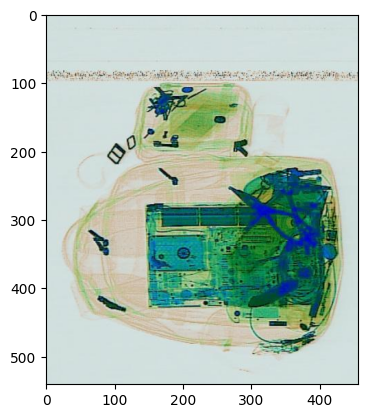

In [37]:
file_path = os.path.join('./dataset', 'JPEGImage', '{}.jpg'.format(image_id))
img = load_image(file_path)
print(os.path.abspath(file_path))
plt.imshow(img)

In [38]:
test_image_size = 224
transform = transforms.Compose([
    Warp(test_image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=model.image_normalization_mean, std=model.image_normalization_std),
])

In [42]:
target = []
with torch.no_grad():
    img_transformed = transform(img)
    batch_img_tensor = torch.unsqueeze(img_transformed, 0)
    target = model(batch_img_tensor)
    print(target)
    target = target[0].numpy()

print('target: {}, image: {}'.format(target, image_id))
target


(tensor([[-10.3923,  -6.6808,  -3.5900,  -1.2475,  -3.9489]]), tensor([[-10.4272,  -6.5698,  -3.5739,  -1.2708,  -3.9007]]), tensor([[-10.7982,  -6.6303,  -3.5370,  -1.4354,  -4.0938]]))
target: [[-10.392286   -6.6808047  -3.5900486  -1.247458   -3.9489322]], image: P08803


array([[-10.392286 ,  -6.6808047,  -3.5900486,  -1.247458 ,  -3.9489322]],
      dtype=float32)

In [40]:
# 'Gun','Knife','Wrench','Pliers','Scissors'
target


array([[-10.392286 ,  -6.6808047,  -3.5900486,  -1.247458 ,  -3.9489322]],
      dtype=float32)